In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read data
df = pd.read_csv('movies.csv')

In [3]:
# Preview data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
# Return unique values of rating
df['rating'].unique()

array(['R', 'PG', 'G', nan, 'Not Rated', 'NC-17', 'Approved', 'TV-PG',
       'PG-13', 'Unrated', 'X', 'TV-MA', 'TV-14'], dtype=object)

In [5]:
# Replace not rated, unrated, and approved ratings with na
df['rating'] = df['rating'].replace('Not Rated', np.nan)
df['rating'] = df['rating'].replace('Unrated', np.nan)
df['rating'] = df['rating'].replace('Approved', np.nan)

In [6]:
# Return unique values of rating
df['rating'].unique()

array(['R', 'PG', 'G', nan, 'NC-17', 'TV-PG', 'PG-13', 'X', 'TV-MA',
       'TV-14'], dtype=object)

In [7]:
# Check for missing data
for column in df.columns:
    print(df[column].isnull().value_counts())

False    7668
Name: name, dtype: int64
False    7255
True      413
Name: rating, dtype: int64
False    7668
Name: genre, dtype: int64
False    7668
Name: year, dtype: int64
False    7666
True        2
Name: released, dtype: int64
False    7665
True        3
Name: score, dtype: int64
False    7665
True        3
Name: votes, dtype: int64
False    7668
Name: director, dtype: int64
False    7665
True        3
Name: writer, dtype: int64
False    7667
True        1
Name: star, dtype: int64
False    7665
True        3
Name: country, dtype: int64
False    5497
True     2171
Name: budget, dtype: int64
False    7479
True      189
Name: gross, dtype: int64
False    7651
True       17
Name: company, dtype: int64
False    7664
True        4
Name: runtime, dtype: int64


In [8]:
# Drop rows with missing data in rating and numerical columns
df.dropna(subset = ['rating','year','score','votes','budget','gross','runtime'], inplace = True, how = 'any')

In [9]:
# Check for missing data
for column in df.columns:
    print(df[column].isnull().value_counts())

False    5361
Name: name, dtype: int64
False    5361
Name: rating, dtype: int64
False    5361
Name: genre, dtype: int64
False    5361
Name: year, dtype: int64
False    5361
Name: released, dtype: int64
False    5361
Name: score, dtype: int64
False    5361
Name: votes, dtype: int64
False    5361
Name: director, dtype: int64
False    5361
Name: writer, dtype: int64
False    5361
Name: star, dtype: int64
False    5361
Name: country, dtype: int64
False    5361
Name: budget, dtype: int64
False    5361
Name: gross, dtype: int64
False    5359
True        2
Name: company, dtype: int64
False    5361
Name: runtime, dtype: int64


In [10]:
# Check for duplicates
duplicates = df.duplicated()
duplicates.value_counts()

False    5361
dtype: int64

In [11]:
# Check data types
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [12]:
# Remove decimal place from votes, budget, gross, and runtime columns
df['votes'] = df['votes'].astype('int64')
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')

In [13]:
# Check data types
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime       int64
dtype: object

In [14]:
# Return unique values of rating
df['rating'].unique()

array(['R', 'PG', 'G', 'NC-17', 'PG-13', 'X', 'TV-MA'], dtype=object)

In [15]:
# Replace TV-MA with R
df['rating'] = df['rating'].replace('TV-MA', 'R')

In [16]:
# Return unique values of rating
df['rating'].unique()

array(['R', 'PG', 'G', 'NC-17', 'PG-13', 'X'], dtype=object)

In [17]:
# Assign numerical values to rating categories
ratings = ['G','PG','PG-13','R','NC-17','X']
df['rating'] = pd.Categorical(df['rating'], ratings, ordered = True)
df['rating'] = df['rating'].cat.codes

In [18]:
# Preview data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,3,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,3,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,1,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,1,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,3,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [19]:
# Find correlation between numerical columns
df.corr()

,rating,year,score,votes,budget,gross,runtime
rating,1.000000,0.021158,0.098741,0.002296,-0.248073,-0.213812,0.136993
year,0.021158,1.000000,0.055126,0.207899,0.330597,0.276135,0.073504
score,0.098741,0.055126,1.000000,0.477968,0.076210,0.226648,0.415331
votes,0.002296,0.207899,0.477968,1.000000,0.439526,0.615670,0.358207
budget,-0.248073,0.330597,0.076210,0.439526,1.000000,0.739406,0.323523
gross,-0.213812,0.276135,0.226648,0.615670,0.739406,1.000000,0.279829
runtime,0.136993,0.073504,0.415331,0.358207,0.323523,0.279829,1.000000


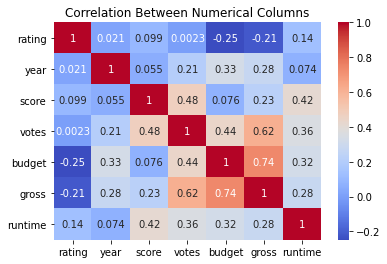

<Figure size 432x288 with 0 Axes>

In [20]:
# Create a heatmap of correlation between numerical columns
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True)
plt.title('Correlation Between Numerical Columns')
plt.show()
plt.clf()

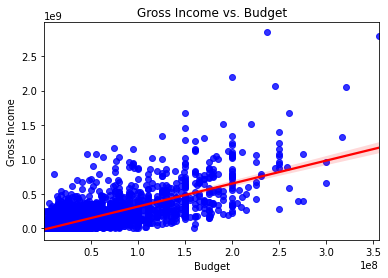

<Figure size 432x288 with 0 Axes>

In [21]:
# Create a scatter plot of gross income vs. budget
sns.regplot(data = df, x = 'budget', y = 'gross', scatter_kws = {'color': 'blue'}, line_kws={'color':'red'})
plt.title('Gross Income vs. Budget')
plt.xlabel('Budget')
plt.ylabel('Gross Income')
plt.show()
plt.clf()

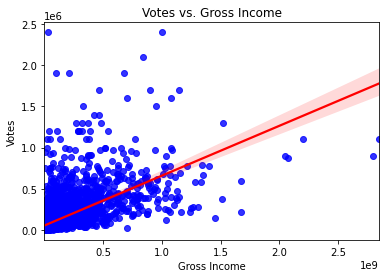

<Figure size 432x288 with 0 Axes>

In [22]:
# Create a scatter plot of votes vs. gross income
sns.regplot(data = df, x = 'gross', y = 'votes', scatter_kws = {'color': 'blue'}, line_kws={'color':'red'})
plt.title('Votes vs. Gross Income')
plt.xlabel('Gross Income')
plt.ylabel('Votes')
plt.show()
plt.clf()